Number of frames in segmentation DICOM: 24
Shape of segmentation mask: (24, 512, 512)
Referenced Series UID: 1801040320200103051513090319.1685.1.0


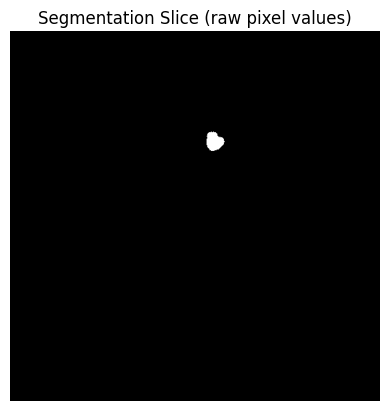

In [9]:
import pydicom
import highdicom
from highdicom.seg import Segmentation
import numpy as np
import matplotlib.pyplot as plt

# Load the DICOM SEG file
ds = pydicom.dcmread('../data/RadCTTACEomics_1685/1685/10_AP_Ax2.50mm_ManualROI_Tumor.dcm')
#ds = pydicom.dcmread('../data/RadCTTACEomics_1685/1685/10_AP_Ax2.50mm_ManualROI_Liver.dcm')

# use '../data/RadCTTACEomics_1685/1685/10_AP_Ax2.50mm/' and it's segmentation '../data/RadCTTACEomics_1685/1685/10_AP_Ax2.50mm_ManualROI_Tumor.dcm'

# Access pixel data
# This is typically a binary or label image stored as uint8
seg_mask = ds.pixel_array  # shape: (num_frames, rows, cols)

# Check the number of frames in the segmentation DICOM file
print("Number of frames in segmentation DICOM:", ds.NumberOfFrames)

# Check the dimensions of the segmentation mask
print("Shape of segmentation mask:", seg_mask.shape)

# Check the referenced series information to understand the relationship with the original DICOM
if hasattr(ds, 'ReferencedSeriesSequence'):
    print("Referenced Series UID:", ds.ReferencedSeriesSequence[0].SeriesInstanceUID)

# Visualize middle slice
middle_slice = seg_mask[seg_mask.shape[0] // 2]
seg_mask.shape
plt.imshow(middle_slice, cmap='gray')
plt.title('Segmentation Slice (raw pixel values)')
plt.axis('off')
plt.show()


In [43]:
dir(ds.PerFrameFunctionalGroupsSequence[0].DerivationImageSequence[0].SourceImageSequence[0])

['PurposeOfReferenceCodeSequence',
 'ReferencedFrameNumber',
 'ReferencedSOPClassUID',
 'ReferencedSOPInstanceUID',
 'SpatialLocationsPreserved',
 '__array__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_character_set',
 '_convert_pixel_data_using_handler',
 '_convert_pixel_data_without_handler',
 '_dataset_slice',
 '_dict',
 '_do_pixel_data_conversion',
 '_is_implicit_VR',
 '_is_little_endian',
 '_parent_encoding',
 '_pixel_array',
 '_pixel_array_opts',
 '_pixel_id',
 '_pixel_rep',
 '_pretty_str',
 '_private_blocks

In [47]:
dir(ds.PerFrameFunctionalGroupsSequence[0])

['DerivationImageSequence',
 'FrameContentSequence',
 'PlanePositionSequence',
 'SegmentIdentificationSequence',
 '__array__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_character_set',
 '_convert_pixel_data_using_handler',
 '_convert_pixel_data_without_handler',
 '_dataset_slice',
 '_dict',
 '_do_pixel_data_conversion',
 '_is_implicit_VR',
 '_is_little_endian',
 '_parent_encoding',
 '_pixel_array',
 '_pixel_array_opts',
 '_pixel_id',
 '_pixel_rep',
 '_pretty_str',
 '_private_blocks',
 '_read_charset',
 '_read_impl

In [51]:
ds.PerFrameFunctionalGroupsSequence[-1]

(0008,9124)  Derivation Image Sequence  1 item(s) ---- 
   (0008,2112)  Source Image Sequence  1 item(s) ---- 
      (0008,1150) Referenced SOP Class UID            UI: CT Image Storage
      (0008,1155) Referenced SOP Instance UID         UI: 1.2.840.113704.1.111.3956.1410855854.4865
      (0008,1160) Referenced Frame Number             IS: '27'
      (0028,135A) Spatial Locations Preserved         CS: 'YES'
      (0040,A170)  Purpose of Reference Code Sequence  1 item(s) ---- 
         (0008,0100) Code Value                          SH: '121322'
         (0008,0102) Coding Scheme Designator            SH: 'DCM'
         (0008,0104) Code Meaning                        LO: 'Source image for image processing operation'
         ---------
      ---------
   (0008,9215)  Derivation Code Sequence  1 item(s) ---- 
      (0008,0100) Code Value                          SH: '113076'
      (0008,0102) Coding Scheme Designator            SH: 'DCM'
      (0008,0104) Code Meaning                  

In [44]:
ds.PerFrameFunctionalGroupsSequence[0].DerivationImageSequence[0].SourceImageSequence[0].ReferencedFrameNumber

'65'

In [52]:
ds.PerFrameFunctionalGroupsSequence[-1].DerivationImageSequence[0].SourceImageSequence[0].ReferencedFrameNumber

'27'

In [30]:
ds.SegmentSequence[0]

(0062,0003)  Segmented Property Category Code Sequence  1 item(s) ---- 
   (0008,0100) Code Value                          SH: '49755003'
   (0008,0102) Coding Scheme Designator            SH: 'SCT'
   (0008,0104) Code Meaning                        LO: 'Morphologically Abnormal Structure'
   ---------
(0062,0004) Segment Number                      US: 1
(0062,0005) Segment Label                       LO: 'Tumor'
(0062,0008) Segment Algorithm Type              CS: 'MANUAL'
(0062,000D) Recommended Display CIELab Value    US: [34886, 53484, 50172]
(0062,000F)  Segmented Property Type Code Sequence  1 item(s) ---- 
   (0008,0100) Code Value                          SH: '108369006'
   (0008,0102) Coding Scheme Designator            SH: 'SCT'
   (0008,0104) Code Meaning                        LO: 'tumor'
   ---------

In [27]:
ds.SourceImageSequence[1]

(0008,1150) Referenced SOP Class UID            UI: CT Image Storage
(0008,1155) Referenced SOP Instance UID         UI: 1.2.840.113704.1.111.3956.1410855854.4866